In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
ClassPred=pd.read_csv("ClassPred.csv",encoding='utf-8')

In [7]:
ClassPred

,Class,R_10,R_8,R_6,G_10,G_8,G_6,B_10,B_8,B_6
0,Cr6,121.672054,109.359213,90.471411,124.451532,123.095702,112.594114,17.292427,21.563033,25.679999
1,Cr6,121.112364,111.078571,89.707904,125.224216,119.413744,111.906582,14.712391,14.392525,25.054435
2,Cr6,123.482756,110.283060,92.588624,126.517010,119.108594,115.020900,15.088266,19.131002,29.599695
3,Cr6,130.849574,114.185563,90.710288,124.409015,125.553448,110.210652,18.281800,22.302888,34.465752
4,Cr6,125.905786,109.996709,87.328086,125.597695,117.168442,108.006616,19.037181,22.967507,34.676065
...,...,...,...,...,...,...,...,...,...,...
4495,Cu2,73.021409,80.692311,87.619552,93.103048,97.952136,102.346207,132.140841,127.525007,132.915097
4496,Cu2,70.031769,74.444332,87.377391,93.077330,98.912069,96.479554,124.145686,135.253640,129.808864
4497,Cu2,76.061116,76.297786,87.247618,89.167043,96.873055,101.787655,124.908030,134.082455,133.957369
4498,Cu2,71.129242,78.322988,84.076328,96.619766,102.250988,102.021502,125.259674,133.910660,131.717908


In [157]:
ClassPred['Class'].value_counts()

Class
Cr6    500
Cd2    500
Co2    500
Sn2    500
Al3    500
Ag     500
Hg2    500
Zn2    500
Cu2    500
Name: count, dtype: int64

In [158]:
ClassPred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   4500 non-null   object 
 1   R_10    4500 non-null   float64
 2   R_8     4500 non-null   float64
 3   R_6     4500 non-null   float64
 4   G_10    4500 non-null   float64
 5   G_8     4500 non-null   float64
 6   G_6     4500 non-null   float64
 7   B_10    4500 non-null   float64
 8   B_8     4500 non-null   float64
 9   B_6     4500 non-null   float64
dtypes: float64(9), object(1)
memory usage: 351.7+ KB


In [159]:
ClassPred.describe()

,R_10,R_8,R_6,G_10,G_8,G_6,B_10,B_8,B_6
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,88.332278,77.470631,80.038301,114.324889,105.985361,116.202843,120.988968,122.061103,134.474151
std,52.214182,36.770915,38.650804,47.578205,41.880032,33.457804,58.798000,59.386350,48.883355
min,24.000701,26.003333,20.023643,26.004921,25.001026,55.000100,10.051541,8.004969,25.017636
25%,44.832874,49.479633,51.630463,89.386239,92.248314,95.669603,125.183869,129.374578,129.394221
50%,71.654329,76.381778,76.798972,117.700998,101.183380,110.449029,139.272322,138.643179,148.721606
75%,128.191895,90.419968,93.437560,158.501880,123.600317,149.840298,159.750419,160.298555,164.458554
max,192.953782,160.994446,158.989808,188.988087,176.994449,175.996483,184.999794,187.913454,195.992802


In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

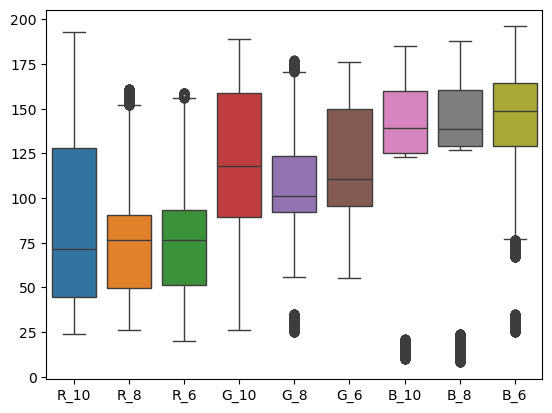

In [161]:
sns.boxplot(ClassPred)

In [8]:
X,y=ClassPred.drop(columns='Class'),ClassPred['Class']

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,shuffle=True)

In [164]:
X_train.shape

(3600, 9)

In [165]:
pd.Series(y_train).value_counts()

Class
Hg2    414
Sn2    408
Cd2    406
Al3    404
Zn2    403
Co2    393
Ag     393
Cr6    390
Cu2    389
Name: count, dtype: int64

In [166]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score

In [167]:
clf1 = LogisticRegression(max_iter=1000, random_state=42)
# clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = SVC(probability=True, random_state=42)  # probability=True for soft voting

In [168]:
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('svc', clf3)],
    voting='soft'   
)

In [169]:
voting_clf.fit(X,y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [170]:
voting_clf.predict(X_test)

array(['Al3', 'Zn2', 'Ag', 'Ag', 'Cr6', 'Ag', 'Sn2', 'Cr6', 'Zn2', 'Zn2',
       'Cr6', 'Al3', 'Zn2', 'Co2', 'Co2', 'Zn2', 'Cd2', 'Cu2', 'Ag',
       'Sn2', 'Al3', 'Sn2', 'Hg2', 'Zn2', 'Cu2', 'Co2', 'Sn2', 'Co2',
       'Hg2', 'Cd2', 'Cu2', 'Hg2', 'Cr6', 'Cu2', 'Cu2', 'Zn2', 'Sn2',
       'Sn2', 'Cu2', 'Zn2', 'Cr6', 'Cr6', 'Ag', 'Hg2', 'Cd2', 'Al3', 'Ag',
       'Zn2', 'Cd2', 'Co2', 'Hg2', 'Hg2', 'Sn2', 'Hg2', 'Zn2', 'Cr6',
       'Cr6', 'Cr6', 'Sn2', 'Co2', 'Cu2', 'Cu2', 'Co2', 'Al3', 'Cr6',
       'Ag', 'Cd2', 'Cr6', 'Zn2', 'Cr6', 'Zn2', 'Zn2', 'Sn2', 'Cd2', 'Ag',
       'Cd2', 'Hg2', 'Cr6', 'Ag', 'Hg2', 'Ag', 'Cr6', 'Sn2', 'Sn2', 'Sn2',
       'Cd2', 'Sn2', 'Al3', 'Co2', 'Zn2', 'Co2', 'Hg2', 'Cu2', 'Co2',
       'Sn2', 'Cd2', 'Cu2', 'Al3', 'Ag', 'Ag', 'Al3', 'Ag', 'Cu2', 'Al3',
       'Hg2', 'Sn2', 'Ag', 'Zn2', 'Co2', 'Hg2', 'Zn2', 'Sn2', 'Co2',
       'Sn2', 'Al3', 'Cu2', 'Hg2', 'Cu2', 'Hg2', 'Al3', 'Cr6', 'Ag', 'Ag',
       'Al3', 'Sn2', 'Cu2', 'Cu2', 'Ag', 'Zn2', 'Al3', 'Cd2', 'C

In [171]:
def predict_performance(y_test,y_pred):
    print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Classifier Score",f1_score(y_test,y_pred,average='micro'))


In [172]:
y_pred=voting_clf.predict(X_test)

In [173]:
predict_performance(y_test,y_pred,)

Voting Classifier Accuracy: 1.0
F1 Classifier Score 1.0


In [174]:
y_pred=voting_clf.predict(X_train)

In [175]:
predict_performance(y_train,y_pred)

Voting Classifier Accuracy: 1.0
F1 Classifier Score 1.0


In [178]:
import pickle

with open("Metal_Class_Predictor.pkl","wb") as f:
    pickle.dump(voting_clf,f)



In [10]:


with open("Metal_Class_Predictor.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

In [11]:
loaded_model.predict(X)


array(['Cr6', 'Cr6', 'Cr6', ..., 'Cu2', 'Cu2', 'Cu2'], dtype=object)